## Plan of the module 2:

1. Deutsch algorithm overview
1. Deutsch algorithm - implementation using quantum composer
1. Deutsch-Jozsa algorithm and it's implementation using quantum composer
1. Introduction to Qiskit with exercises
1. Homework

# Deutsch algorithm
* Theoretical explanation and proof.
* implementation in quantum composer.

# Deutsch-Jozsa algorithm

In a case of 2 input qubits, we have 16 possible binary functions.
Each of them gives 0 or 1 for one of 4 possible input sequences: 00, 01, 10, 11.

We'll use quantum composer to implement Deutsch-Jozsa algorithms for various Oracle functions.

Let's implement Deutch-Jozsa function which assignes 0,1,1,0 to each of the possible input sequences of two bits (respectively 00, 01, 10, 11). 

This is the function of adding modulo 2.

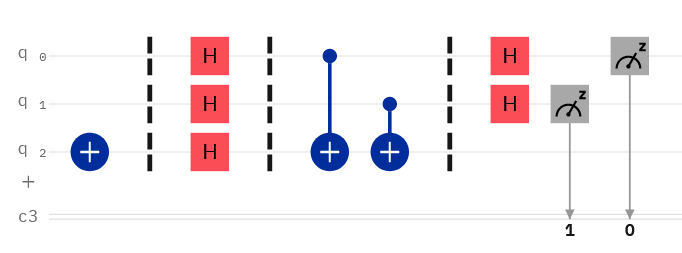

## Exercise 2.1: 
* Create the above circuit in quantum composer
* Verify based on the results of running this circuit, that the oracle function is balanced
* Prove, that the two CNOT gates indeed implement actually the 0110 function (adding modulo 2)

## Exercise 2.2: 
Create a Deutsch-Jozsa circuit where oracle function acting on two qubits has values 0,1,0,1 respectively for 00, 01, 10, 11 as input.

## Exercise 2.3:
Create Deutsch-Jozsa circuit implementing the two possible constant functions as an oracle.

# Introduction to Qiskit

#### Programming SDKs for quantum computers (QSDKs) that exist today:
1. IBM - <b>Qiskit</b> (Python, https://github.com/Qiskit/)
2. Google - <b>Cirq</b> (Python, https://github.com/quantumlib/Cirq)
3. Rigetti - <b>PyQuil</b> (Python, https://github.com/rigetti/pyquil)
4. Microsoft - <b>Microsoft Quantum Development Kit</b> (Q#, https://github.com/microsoft/Quantum)
5. ETH Zurich - <b>Project Q</b> (Python, https://github.com/ProjectQ-Framework/ProjectQ)

#### Quantum Open Source Foundation (QOSF): [https://qosf.org/](https://qosf.org/)

## References - or from where to learn:

* [https://github.com/qiskit](https://github.com/qiskit)

* [https://qiskit.org/](https://qiskit.org/)
    * In particular [https://qiskit.org/textbook](https://qiskit.org/textbook)
    * and https://qiskit.org/textbook-beta/
    * In general [https://qiskit.org/learn/](https://qiskit.org/learn/)

* [https://qiskit.org/documentation/](https://qiskit.org/documentation/)

* [Qiskit documentation tutorials](https://qiskit.org/documentation/tutorials/circuits/)

* finally, if you like to learn from YouTube ;) - https://www.youtube.com/c/qiskit


In [1]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright  

In [2]:
import qiskit
qiskit.__qiskit_version__

{'qiskit': '0.45.0', 'qiskit-aer': '0.12.2', 'qiskit-ignis': None, 'qiskit-ibmq-provider': '0.20.2', 'qiskit-nature': '0.6.2', 'qiskit-finance': None, 'qiskit-optimization': '0.5.0', 'qiskit-machine-learning': '0.6.1'}

In [3]:
from qiskit import QuantumCircuit
from qiskit.providers.aer import QasmSimulator

circuit = QuantumCircuit(2, 2)

circuit.h(0)
circuit.cx(0, 1)
circuit.measure(0, 0) 
circuit.measure(1, 1)

backend = QasmSimulator()

job = backend.run(circuit)

result = job.result()
counts = result.get_counts(circuit)

print(counts)

{'00': 528, '11': 496}


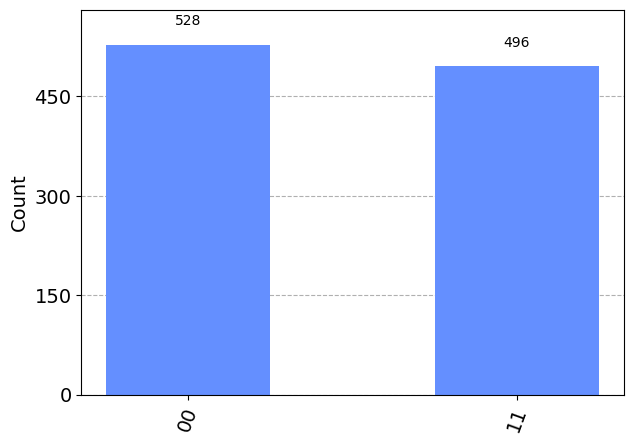

In [4]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

Measurements

`circuit.measure([0,1], [0,1])`

Not all quibits need to be measured.

Number of bits in classical register does not need to be equal to number of qubits.

Running the circuit on chosen backend:

`job = backend.run(circuit, shots=3000)`

`job = execute(circuit, backend, shots=4321)`

Running jobs with remembering individual shots/runs:

`job = execute(circuit, backend, shots=20, memory=True)`

`data = job.result().get_memory()`

`print(data)`

In [5]:
%matplotlib inline
circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

c:\Users\tomek\anaconda3\envs\ibm_venv\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


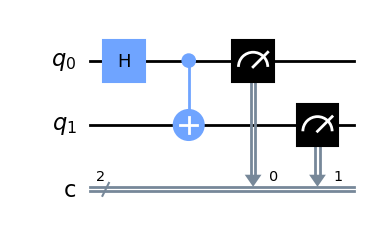

In [6]:
circuit.draw('mpl')

## Exercise 2.4 - coin flip simulation
Write program in Qiskit which will generate N random bit values (0 or 1) using Hadamard gate and quantum simulator.
Hadamard gate puts the qubit (initialized in |0>) in a superposition of |0> and |1> states. Subsequent measurement gives equal probability of getting 0 and 1. N is a parameter which can be set for any number.
We use simulator, which means the numbers are not really random (are pseudo-random), but in subsequent exercise we will use real quantum computer for generating really random numbers.

## Providers and Backends

Provider
- entity that provides access to group of backends
- Qiskit includes 2 providers: `Aer` and `IBMQ`
- implements:
    - `backends()`
    - `get_backend(name)`

Backend
- represents either simulator or real quantum computer
- inherits from `BaseBackend`
- implements:
    - `run(qobj)`
    - `configuration()`
    - `properties()`
    - `name()`
    - `status()`

## Account and token

`IBMQ.save_account('<TOKEN>')`

If account is already saved, it can be overwritten with:

`IBMQ.save_account('<TOKEN>', overwrite=True)`

`IBMQ.stored_account()` - shows what account is stored on the machine

`IBMQ.delete_account()` - deletes currently stored account

More details: https://quantum-computing.ibm.com/lab/docs/iql/manage/account/ibmq

In [7]:
from qiskit import IBMQ
IBMQ.providers()

C:\Users\tomek\AppData\Local\Temp\ipykernel_29212\1885643540.py:2: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.providers()


[]

In [8]:
provider = IBMQ.load_account()

IBMQAccountCredentialsNotFound: 'No IBM Quantum Experience credentials found.'

In [ ]:
IBMQ.providers()

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

In [ ]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_oslo') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [ ]:
for backend in provider.backends():
    print(backend.status().to_dict())

{'backend_name': 'ibmq_qasm_simulator', 'backend_version': '0.1.547', 'operational': True, 'pending_jobs': 1, 'status_msg': 'active'}
{'backend_name': 'ibmq_lima', 'backend_version': '1.0.40', 'operational': True, 'pending_jobs': 526, 'status_msg': 'active'}
{'backend_name': 'ibmq_belem', 'backend_version': '1.0.52', 'operational': True, 'pending_jobs': 63, 'status_msg': 'active'}
{'backend_name': 'ibmq_quito', 'backend_version': '1.1.35', 'operational': True, 'pending_jobs': 9, 'status_msg': 'active'}
{'backend_name': 'simulator_statevector', 'backend_version': '0.1.547', 'operational': True, 'pending_jobs': 1, 'status_msg': 'active'}
{'backend_name': 'simulator_mps', 'backend_version': '0.1.547', 'operational': True, 'pending_jobs': 1, 'status_msg': 'active'}
{'backend_name': 'simulator_extended_stabilizer', 'backend_version': '0.1.547', 'operational': True, 'pending_jobs': 1, 'status_msg': 'active'}
{'backend_name': 'simulator_stabilizer', 'backend_version': '0.1.547', 'operational'

In [ ]:
from qiskit.tools.monitor import backend_overview, backend_monitor
backend_overview()

ibm_oslo                     ibm_nairobi                  ibmq_manila
--------                     -----------                  -----------
Num. Qubits:  7              Num. Qubits:  7              Num. Qubits:  5
Pending Jobs: 113            Pending Jobs: 282            Pending Jobs: 110
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           Operational:  True           Operational:  True
Avg. T1:      107.0          Avg. T1:      102.0          Avg. T1:      168.8
Avg. T2:      109.2          Avg. T2:      94.1           Avg. T2:      50.8



ibmq_quito                  ibmq_belem                   ibmq_lima
----------                  ----------                   ---------
Num. Qubits:  5             Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 10            Pending Jobs: 63             Pending Jobs: 526
Least busy:   True          Least busy:   False          Least busy:   False
Operational:  True          Operationa

In [ ]:
real_backend = provider.get_backend('ibmq_belem')

In [ ]:
import pprint

pprint.pprint(real_backend.configuration().to_dict())

{'acquisition_latency': [],
 'allow_object_storage': True,
 'allow_q_object': True,
 'backend_name': 'ibmq_belem',
 'backend_version': '1.0.52',
 'basis_gates': ['id', 'rz', 'sx', 'x', 'cx', 'reset'],
 'channels': {'acquire0': {'operates': {'qubits': [0]},
                           'purpose': 'acquire',
                           'type': 'acquire'},
              'acquire1': {'operates': {'qubits': [1]},
                           'purpose': 'acquire',
                           'type': 'acquire'},
              'acquire2': {'operates': {'qubits': [2]},
                           'purpose': 'acquire',
                           'type': 'acquire'},
              'acquire3': {'operates': {'qubits': [3]},
                           'purpose': 'acquire',
                           'type': 'acquire'},
              'acquire4': {'operates': {'qubits': [4]},
                           'purpose': 'acquire',
                           'type': 'acquire'},
              'd0': {'operates': {'qubi

In [ ]:
from qiskit import execute
real_job = execute(circuit, real_backend, shots=1024)

## Jobs management

In [ ]:
real_job_id=real_job.job_id()
real_job_id

'63754b41d849aa611a312444'

In [ ]:
real_job.queue_position()

In [ ]:
real_job.status()

<JobStatus.DONE: 'job has successfully run'>

`<JobStatus.QUEUED: 'job is queued'>`

`<JobStatus.RUNNING: 'job is actively running'>`

`<JobStatus.DONE: 'job has successfully run'>`

In [ ]:
for job in real_backend.jobs():
    print(str(job.job_id()) + "   " + str(job.creation_date()) + "   " + str(job.status()))

63754b41d849aa611a312444   2022-11-16 21:42:41.302000+01:00   JobStatus.DONE
628624a8e7e2a7d0fc67eefd   2022-05-19 13:06:16.357000+02:00   JobStatus.DONE
62840b7ee613280e0db0223f   2022-05-17 22:54:22.560000+02:00   JobStatus.DONE
62840b53e7e2a76b3a67e44a   2022-05-17 22:53:39.899000+02:00   JobStatus.DONE
622a6d58a96c2a61e9a03b5a   2022-03-10 22:27:52.013000+01:00   JobStatus.DONE
6224cf3787f7024f7f5498cf   2022-03-06 16:11:51.808000+01:00   JobStatus.DONE
618ecf0dcd15645928eb6145   2021-11-12 21:31:09.610000+01:00   JobStatus.DONE
618531aa4ba990e8a18fe5b9   2021-11-05 14:29:14.409000+01:00   JobStatus.DONE
60f1ec64a56daa4c20baf730   2021-07-16 22:30:28.308000+02:00   JobStatus.DONE
60f1ebbe3d8e69479d1bc4b0   2021-07-16 22:27:42.165000+02:00   JobStatus.DONE


In [ ]:
real_result = real_backend.retrieve_job(real_job_id).result()

In [ ]:
real_counts = real_result.get_counts()

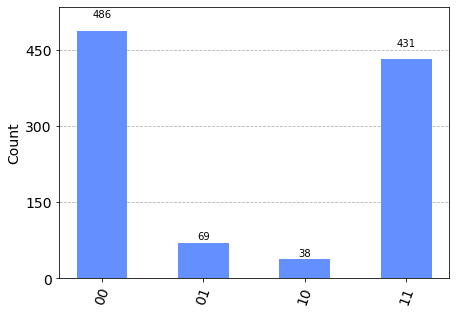

In [ ]:
plot_histogram(real_counts)

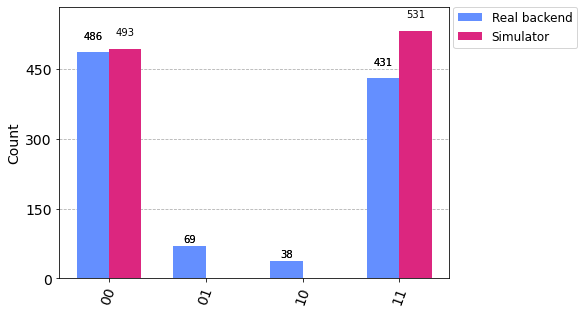

In [ ]:
plot_histogram([real_counts, counts], legend=["Real backend", "Simulator"])

You can execute an array of circuits with one job...to wait in the queue only once ;)

`circuit1 = QuantumCircuit(...)
...
circuit2 = QuantumCircuit(...)
...
job = execute([circuit1, circuit2], backend=real_backend)`

In [ ]:
from qiskit import execute
real_job = execute(circuit, real_backend, shots=1024)

In [ ]:
from qiskit.tools.monitor import job_monitor
job_monitor(real_job, interval=5)

Job Status: job has successfully run


## Exercise 2.5 - random numbers generator
Generate 100 random numbers from 0 to 127 using quantum computer.

# HOMEWORK

## Homework 1

Write qiskit circuit introducing the superposition of the binary representation of first letters of your name and surname.

Write Matplotlib plot visualizing the result.

Do the visualization when run on simulator.
Then run on real hardware limiting to 5 qubits and adding fixed constant qubits later on.

**Send this to me at Tomasz.Stopa@pl.ibm.com BEFORE the next meeting.**


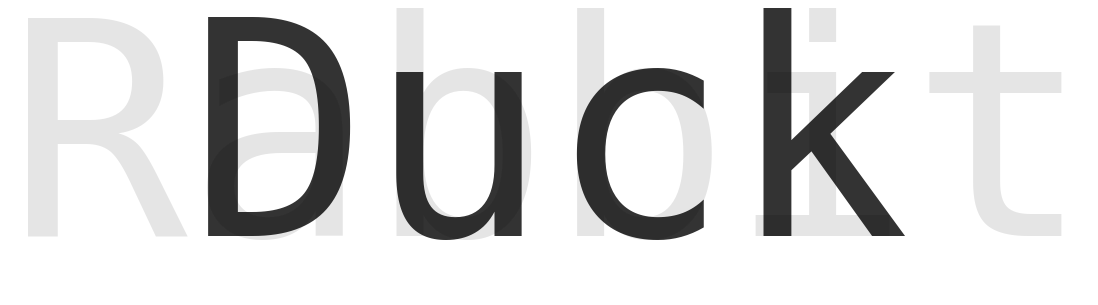

In [ ]:
# Hint:

import matplotlib.pyplot as plt
plt.rc('font', family='monospace')
plt.annotate('Rabbit', (0.5,0.5), va="center", ha="center", color = (0,0,0,0.1), size = 300)
plt.annotate('Duck', (0.5,0.5), va="center", ha="center", color = (0,0,0,0.8), size = 300)
plt.axis('off')
plt.show()

# Homework 2

Get familiar with announcements from Quantum Summit last week: https://newsroom.ibm.com/2022-11-09-IBM-Unveils-400-Qubit-Plus-Quantum-Processor-and-Next-Generation-IBM-Quantum-System-Two